In [1]:
#required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
#csv file load
soil_data = pd.read_csv('soil.csv')
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [3]:
#drop the training example with missing rows
soil_data.dropna(inplace=True)
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [4]:
#drop the district column
soil_data = soil_data.drop('District ', axis=1)
soil_data

,Zn %,Fe%,Cu %,Mn %,B %,S %
0,67.67,65.14,91.88,77.70,73.54,85.90
1,80.51,78.19,99.77,91.82,89.04,88.62
2,79.27,88.14,95.54,97.24,88.05,95.67
3,58.30,71.16,98.86,91.40,86.15,86.81
4,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...
668,93.95,100.00,98.63,97.06,78.52,22.07
669,100.00,100.00,100.00,84.81,100.00,62.50
670,98.56,93.78,97.61,68.60,81.34,44.98
671,96.36,99.59,100.00,94.31,87.85,36.84


In [5]:
#randomly select 155 examples
soil_data = soil_data.sample(n=155)
soil_data

,Zn %,Fe%,Cu %,Mn %,B %,S %
150,65.87,81.80,94.29,99.74,61.50,40.66
655,97.15,98.95,99.49,97.34,95.83,87.87
124,54.34,91.47,90.01,94.74,66.24,90.13
667,90.91,100.00,100.00,90.91,90.91,100.00
554,70.91,60.17,97.09,81.04,67.61,84.40
...,...,...,...,...,...,...
47,97.42,99.91,99.98,99.77,0.48,99.52
230,57.43,96.26,98.46,98.93,57.69,82.54
612,60.28,74.00,98.93,87.40,70.72,66.73
410,64.77,100.00,99.87,89.77,98.37,93.06


In [6]:
soil_data.columns

Index(['Zn %', 'Fe%', 'Cu %', 'Mn %', 'B %', 'S %'], dtype='object')

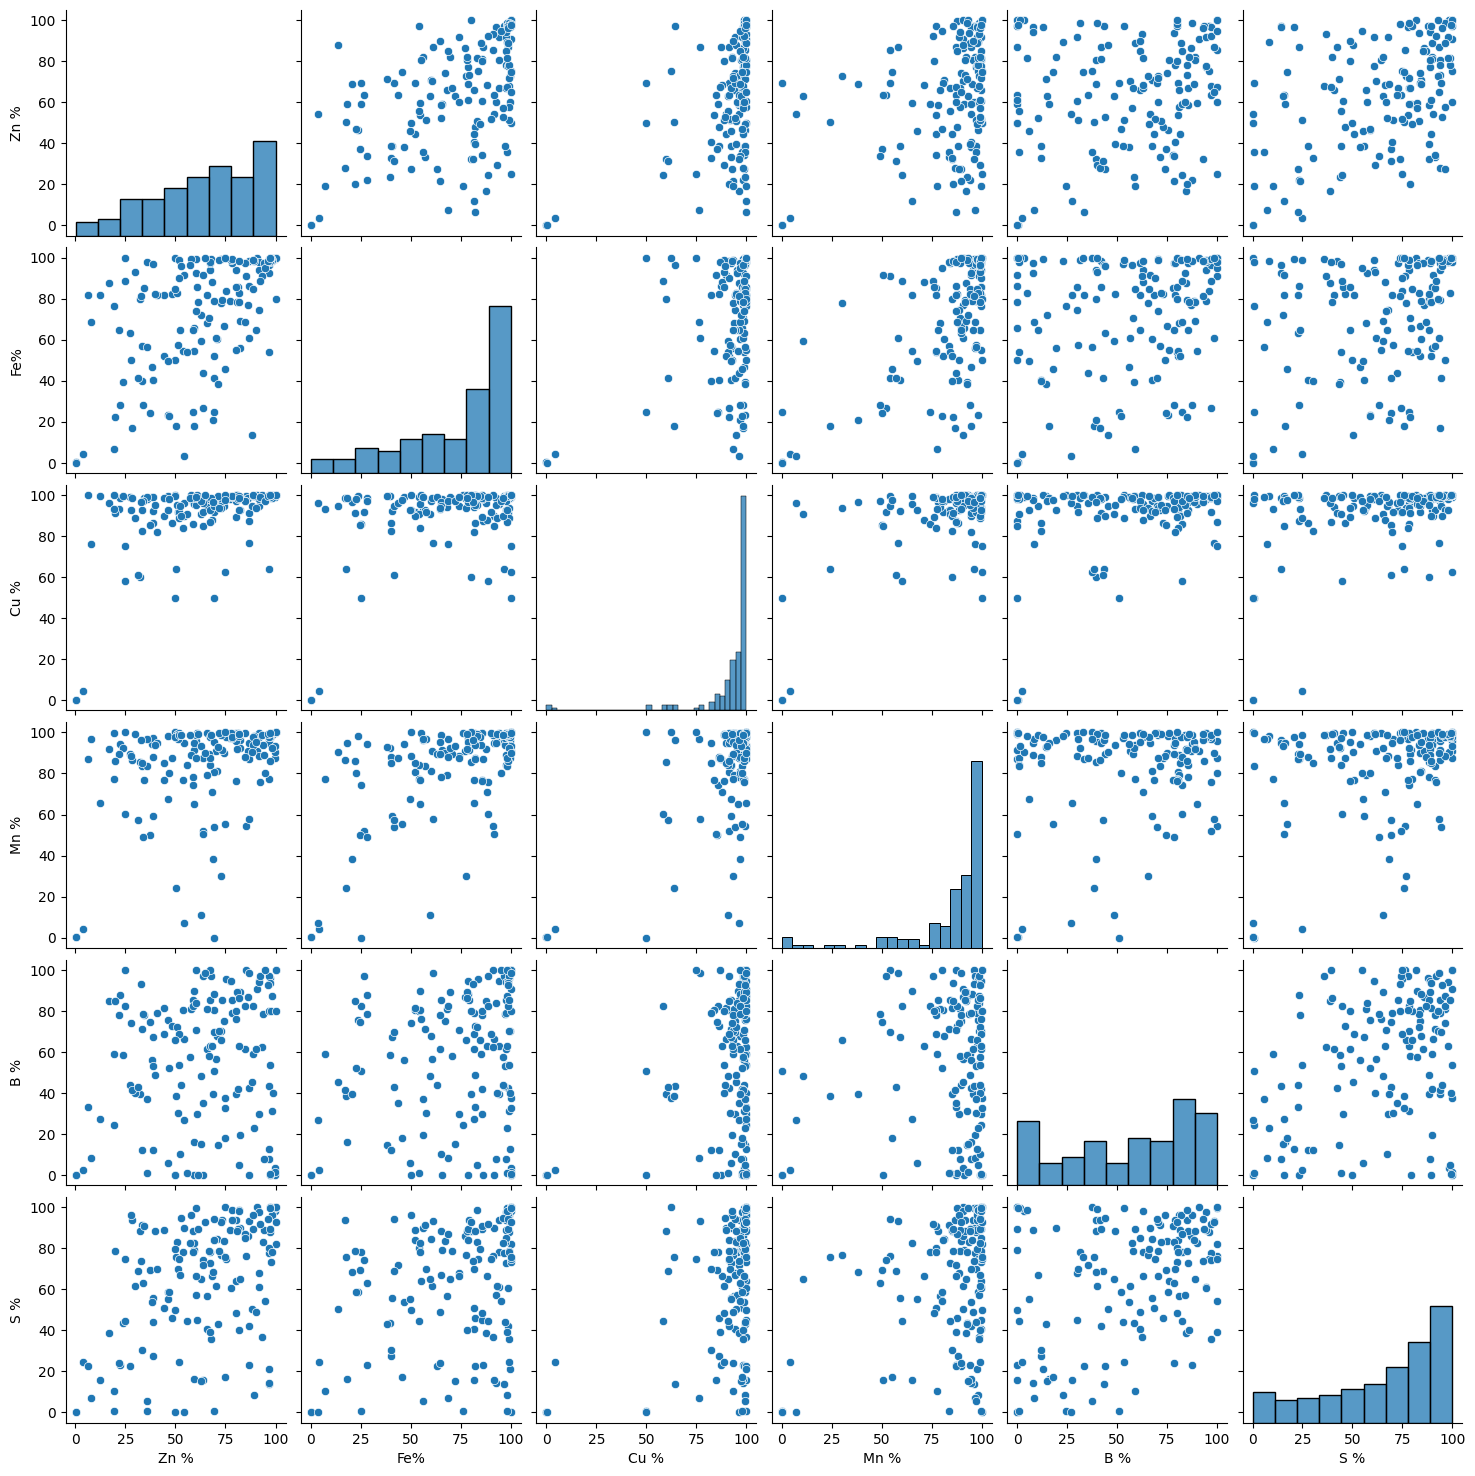

In [7]:
sns.pairplot(soil_data)

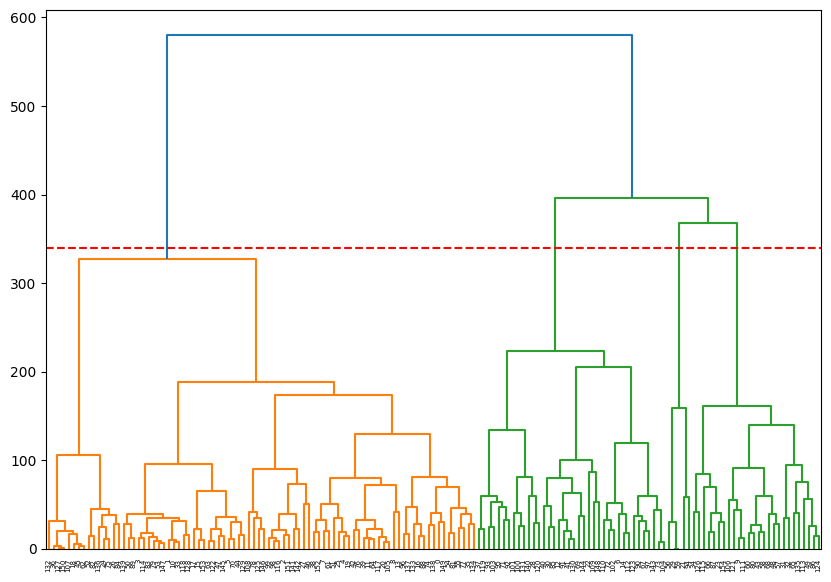

In [8]:
#Drawing the dendogram
plt.figure(figsize=(10, 7)) 
clusters = shc.linkage(soil_data,method = 'ward')
shc.dendrogram(clusters)
plt.axhline(y = 340, color = 'r', linestyle = '--')

We can clearly see from dendogram that the number of clusters is 3 because the longest vertical line exist when the number of clusters is 3 and so there is the break line.

SINGLE LINKAGE


In [9]:
clustering_model_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clustering_model_1.fit(soil_data)
data_labels_1 = clustering_model_1.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

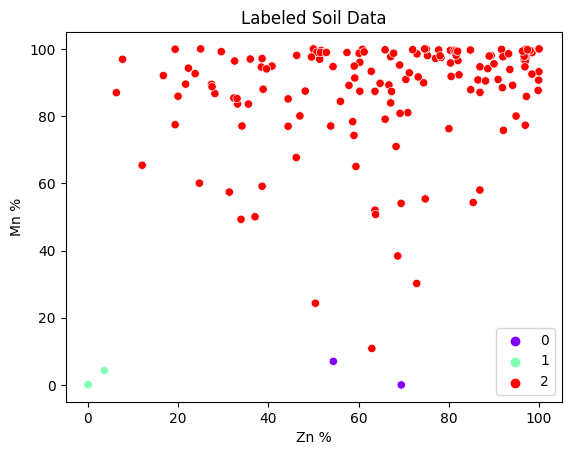

In [10]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_1,
                palette="rainbow").set_title('Labeled Soil Data')

COMPLETE LINKAGE

In [11]:
clustering_model_2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clustering_model_2.fit(soil_data)
data_labels_2 = clustering_model_2.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

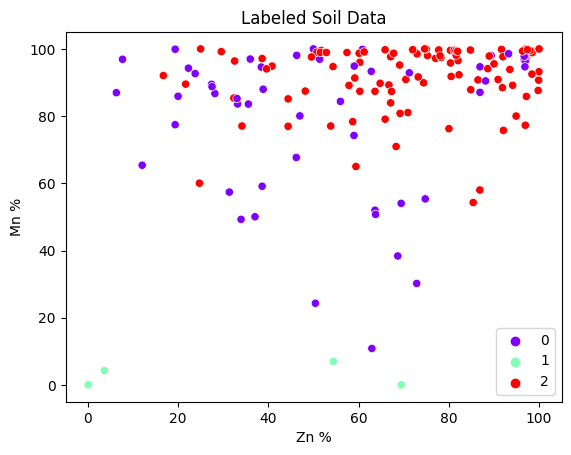

In [12]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_2,
                palette="rainbow").set_title('Labeled Soil Data')

AVERAGE LINKAGE

In [13]:
clustering_model_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clustering_model_3.fit(soil_data)
data_labels_3 = clustering_model_3.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

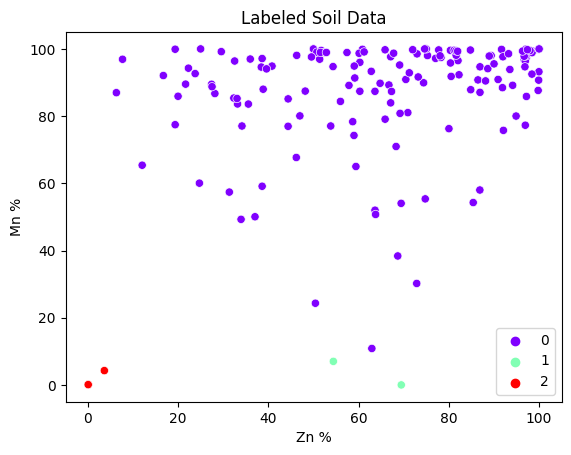

In [14]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_3,
                palette="rainbow").set_title('Labeled Soil Data')

In [15]:
clustering_model_4 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
clustering_model_4.fit(soil_data)
data_labels_4 = clustering_model_4.labels_

Text(0.5, 1.0, 'Labeled Soil Data')

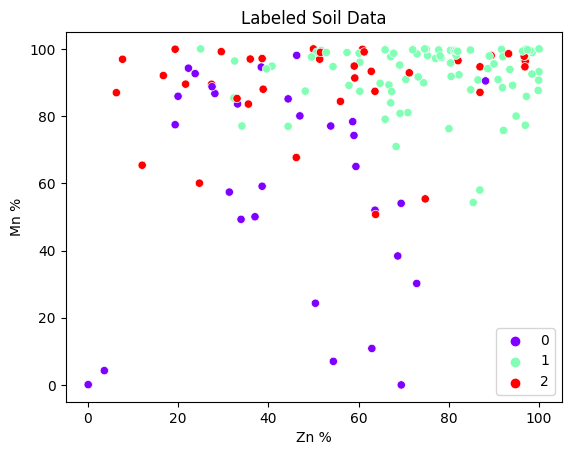

In [16]:
#plotting the data with showing the clusters
sns.scatterplot(x='Zn %', 
                y='Mn %', 
                data=soil_data, 
                hue=data_labels_4,
                palette="rainbow").set_title('Labeled Soil Data')